In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [4]:
df1 = pd.read_csv('UN_MigrantStockTotal_2015_Table_a.csv')
df2 = pd.read_csv('UN_MigrantStockTotal_2015_Table_b.csv')

# Raw Data Cleaning and organizing

In [54]:
#remove values = .. from the dataframe using regular expressions
df1.replace(regex =True, inplace=True, to_replace = r'\..', value = r'')
df2.replace(regex =True, inplace=True, to_replace = r'\..', value = r'')

df1

Unnamed: 0            Country or area  Country code Major area  \
0              0                    Albania             8     Europe   
1              1                    Algeria            12     Africa   
2              2             American Samoa            16    Oceania   
3              3                    Andorra            20     Europe   
4              4                     Angola            24     Africa   
...          ...                        ...           ...        ...   
4153        4153  Wallis and Futuna Islands           876    Oceania   
4154        4154             Western Sahara           732     Africa   
4155        4155                      Yemen           887       Asia   
4156        4156                     Zambia           894     Africa   
4157        4157                   Zimbabwe           716     Africa   

      Major area code           Region  Region code Sub-Saharan Africa  \
0                 908  Southern Europe          925                 No   
1                 903  Northern Africa          912                 No   
2                 909        Polynesia          957                 No   
3                 908  Southern Europe          925                 No   
4                 903    Middle Africa          911                Yes   
...               ...              ...          ...                ...   
4153              909        Polynesia          957                 No   
4154              903  Northern Africa          912                 No   
4155              935     Western Asia          922                 No   
4156              903   Eastern Africa          910                Yes   
4157              903   Eastern Africa          910                Yes   

                                     Development status  Year  \
0                                      Developed region  1990   
1     Neither Developed region nor Least developed c...  1990   
2     Neither Developed region nor Least developed c...  1990   
3                                      Developed region  1990   
4                               Least developed country  1990   
...                                                 ...   ...   
4153  Neither Developed region nor Least developed c...  2015   
4154  Neither Developed region nor Least developed c...  2015   
4155                            Least developed country  2015   
4156                            Least developed country  2015   
4157  Neither Developed region nor Least developed c...  2015   

     Total_or_by_Gender International migrant stock at mid-year  \
0                     T                                  66 013   
1                     T                                 273 954   
2                     T                                  21 283   
3                     T                                  38 904   
4                     T                                  33 517   
...                 ...                                     ...   
4153                  F                                   1 411   
4154                  F                                   2 120   
4155                  F                                 163 704   
4156                  F                                  63 403   
4157                  F                                 171 487   

     Total population at mid-year  \
0                           3 281   
1                          25 912   
2                              47   
3                              55   
4                          11 128   
...                           ...   
4153                                
4154                          273   
4155                       13 279   
4156                        8 118   
4157                        7 915   

     International migrant stock as a percentage of the total population  \
0                                                     2                    
1                                                     1              

In [6]:
#drop labels not needed

df1a = df1.drop(labels = ['Unnamed: 0', 'Country code', 'Major area code', 'Region code'], axis=1)
df2a = df2.drop(labels = ['Unnamed: 0', 'Country code', 'Major area code', 'Region code'], axis=1)

df2a.head()


Country or area Major area           Region Sub-Saharan Africa  \
0         Albania     Europe  Southern Europe                 No   
1         Algeria     Africa  Northern Africa                 No   
2  American Samoa    Oceania        Polynesia                 No   
3         Andorra     Europe  Southern Europe                 No   
4          Angola     Africa    Middle Africa                Yes   

                                  Development status       Year  \
0                                   Developed region  1990-1995   
1  Neither Developed region nor Least developed c...  1990-1995   
2  Neither Developed region nor Least developed c...  1990-1995   
3                                   Developed region  1990-1995   
4                            Least developed country  1990-1995   

  Total_or_by_Gender Annual rate of change of the migrant stock  \
0                  T                                         16   
1                  T                                        -09   
2                  T                                         14   
3                  T                                         02   
4                  T                                         34   

  Annual rate of change of the refugee stock  
0                                         71  
1                                         38  
2                                             
3                                             
4                                        -46

In [7]:
#rename columns for easier calculation

df1a.rename(columns ={
    'Country or area': 'Country',
    'Major area' : 'Major_area',
    'Sub-Saharan Africa' : 'Sub-Saharan_Africa',
    'Development status' : 'Development_status',
    'International migrant stock at mid-year' : 'International_migrant_stock_at_mid-year',
    'Total population at mid-year' : 'Total_population_at_mid-year',
    'International migrant stock as a percentage of the total population' : 'International_migrant_stock_as_percentage_of_total population',
    'Female migrants as a percentage of the international migrant stock' : 'Female_migrants_as_percentage_of_international_migrant_stock',
    'Estimated refugee stock at mid-year' : 'Estimated_refugee_stock_at_mid-year',
    'Refugees as a percentage of the international migrant stock' : 'Refugees_as_percentage_international_migrant_stock',
}, inplace=True)

df2a.rename(columns ={
    'Country or area': 'Country',
    'Major area' : 'Major_area',
    'Sub-Saharan Africa' : 'Sub-Saharan_Africa',
    'Development status' : 'Development_status',
    'Annual rate of change of the migrant stock' : 'Annual_rate_of_change_of_migrant_stock',
    'Annual rate of change of the refugee stock' : 'Annual_rate_of_change_of_refugee_stock'
}, inplace=True)
                 
                 
df2a.head(4)

Country Major_area           Region Sub-Saharan_Africa  \
0         Albania     Europe  Southern Europe                 No   
1         Algeria     Africa  Northern Africa                 No   
2  American Samoa    Oceania        Polynesia                 No   
3         Andorra     Europe  Southern Europe                 No   

                                  Development_status       Year  \
0                                   Developed region  1990-1995   
1  Neither Developed region nor Least developed c...  1990-1995   
2  Neither Developed region nor Least developed c...  1990-1995   
3                                   Developed region  1990-1995   

  Total_or_by_Gender Annual_rate_of_change_of_migrant_stock  \
0                  T                                     16   
1                  T                                    -09   
2                  T                                     14   
3                  T                                     02   

  Annual_rate_of_change_of_refugee_stock  
0                                     71  
1                                     38  
2                                         
3

In [8]:
#Finding missing values within dataset

# three columns have missing values at the end have missing values as follows
# 1. Female_migrants_as_percentage_of_international_migrant_stock: missing data for male and total
# 2. Estimated_refugee_stock_at_mid_year: missing data for female and male estimate 
# 3. Refugees_as_percentage_international_migrant_stock: missing data by female and male

df1a.isnull().sum(axis=0)



Country                                                             0
Major_area                                                          0
Region                                                              0
Sub-Saharan_Africa                                                  0
Development_status                                                  0
Year                                                                0
Total_or_by_Gender                                                  0
International_migrant_stock_at_mid-year                             0
Total_population_at_mid-year                                        0
International_migrant_stock_as_percentage_of_total population       0
Female_migrants_as_percentage_of_international_migrant_stock     2772
Estimated_refugee_stock_at_mid-year                              2772
Refugees_as_percentage_international_migrant_stock               2772
dtype: int64

In [9]:
# #Finding missing values within UN_countries1

df2a.isnull().sum(axis=0)

Country                                   0
Major_area                                0
Region                                    0
Sub-Saharan_Africa                        0
Development_status                        0
Year                                      0
Total_or_by_Gender                        0
Annual_rate_of_change_of_migrant_stock    0
Annual_rate_of_change_of_refugee_stock    0
dtype: int64

In [10]:
# select data for countries in Africa by Total = both genders included

African_countries1 =df1a.loc[df1a['Total_or_by_Gender']== 'T'].loc[df1a['Major_area']== 'Africa'].drop(['Region', 'Sub-Saharan_Africa','Development_status', 'Female_migrants_as_percentage_of_international_migrant_stock'], axis = 1)

African_countries2 =df2a.loc[df1a['Total_or_by_Gender']== 'T'].loc[df1a['Major_area']== 'Africa'].drop(['Region', 'Sub-Saharan_Africa','Development_status'], axis = 1)


# delete any null values within the new dataset
African_countries1.dropna(axis = 0, how = 'any', inplace =True)
African_countries2.dropna(axis = 0, how = 'any', inplace =True)



African_countries1.to_csv('African Countries1.csv')
African_countries2.to_csv('African Countries2.csv)')

In [11]:
African_countries2.head()


Country Major_area       Year Total_or_by_Gender  \
1        Algeria     Africa  1990-1995                  T   
4         Angola     Africa  1990-1995                  T   
20         Benin     Africa  1990-1995                  T   
25      Botswana     Africa  1990-1995                  T   
30  Burkina Faso     Africa  1990-1995                  T   

   Annual_rate_of_change_of_migrant_stock  \
1                                     -09   
4                                      34   
20                                     60   
25                                     77   
30                                     46   

   Annual_rate_of_change_of_refugee_stock  
1                                      38  
4                                     -46  
20                                    180  
25                                   -383  
30                                     31

# Migrant Data for Rwanda and associated countries

In [14]:
# separate from the file countries related to the Rwanda genocide and Great Lakes crises

Great_Lakes_Countries = African_countries1[(African_countries1['Country'] == 'Uganda') | (African_countries1['Country'] == 'United Republic of Tanzania') | (African_countries1['Country'] == 'Burundi')| (African_countries1['Country'] == 'Rwanda')| (African_countries1['Country'] == 'Democratic Republic of the Congo')].drop(['Major_area','Total_or_by_Gender'], axis =1) 
Great_Lakes_Countries_2 = African_countries2[(African_countries2['Country'] == 'Uganda') | (African_countries2['Country'] == 'United Republic of Tanzania') | (African_countries2['Country'] == 'Burundi')| (African_countries2['Country'] == 'Rwanda')| (African_countries2['Country'] == 'Democratic Republic of the Congo')].drop(['Major_area','Total_or_by_Gender'], axis =1) 


# Remove the empty spaces between numbers
Great_Lakes_Countries.replace(regex =True, inplace=True, to_replace = r'[^\w\d]', value = r'')
Great_Lakes_Countries_2.replace(regex =True, inplace=True, to_replace = r'\s', value = r'')



Great_Lakes_Countries

Country  Year  \
31                         Burundi  1990   
57    DemocraticRepublicoftheCongo  1990   
170                         Rwanda  1990   
214                         Uganda  1990   
218       UnitedRepublicofTanzania  1990   
262                        Burundi  1995   
288   DemocraticRepublicoftheCongo  1995   
401                         Rwanda  1995   
445                         Uganda  1995   
449       UnitedRepublicofTanzania  1995   
493                        Burundi  2000   
519   DemocraticRepublicoftheCongo  2000   
632                         Rwanda  2000   
676                         Uganda  2000   
680       UnitedRepublicofTanzania  2000   
724                        Burundi  2005   
750   DemocraticRepublicoftheCongo  2005   
863                         Rwanda  2005   
907                         Uganda  2005   
911       UnitedRepublicofTanzania  2005   
955                        Burundi  2010   
981   DemocraticRepublicoftheCongo  2010   
1094                        Rwanda  2010   
1138                        Uganda  2010   
1142      UnitedRepublicofTanzania  2010   
1186                       Burundi  2015   
1212  DemocraticRepublicoftheCongo  2015   
1325                        Rwanda  2015   
1369                        Uganda  2015   
1373      UnitedRepublicofTanzania  2015   

     International_migrant_stock_at_mid-year Total_population_at_mid-year  \
31                                    333110                         5613   
57                                    754194                        34963   
170                                   159869                         7260   
214                                   558307                        17384   
218                                   574025                        25458   
262                                   254853                         6239   
288                                  1816963                        42184   
401                                   233200                         5913   
445                                   634620                        20413   
449                                  1106043                        29903   
493                                   125628                         6767   
519                                   744387                        48049   
632                                   347076                         8022   
676                                   634703                        23758   
680                                   928180                        33992   
724                                   172874                         7934   
750                                   622869                        56090   
863                                   432797                         9008   
907                                   652968                        28042   
911                                   770846                        39066   
955                                   235259                         9461   
981                                   588950                        65939   
1094                                  436787                        10294   
1138                                  529160                        33149   
1142                                  308600                        45649   
1186                                  286810                        11179   
1212                                  545694                        77267   
1325                                  441525                        11610   
1369                                  749471                        39032   
1373                                  261222                        53470   

     International_migrant_stock_as_percentage_of_total population  \
31                                                    5              
57                                                    2              
170                                                   2         

In [15]:
Great_Lakes_Countries

Country  Year  \
31                         Burundi  1990   
57    DemocraticRepublicoftheCongo  1990   
170                         Rwanda  1990   
214                         Uganda  1990   
218       UnitedRepublicofTanzania  1990   
262                        Burundi  1995   
288   DemocraticRepublicoftheCongo  1995   
401                         Rwanda  1995   
445                         Uganda  1995   
449       UnitedRepublicofTanzania  1995   
493                        Burundi  2000   
519   DemocraticRepublicoftheCongo  2000   
632                         Rwanda  2000   
676                         Uganda  2000   
680       UnitedRepublicofTanzania  2000   
724                        Burundi  2005   
750   DemocraticRepublicoftheCongo  2005   
863                         Rwanda  2005   
907                         Uganda  2005   
911       UnitedRepublicofTanzania  2005   
955                        Burundi  2010   
981   DemocraticRepublicoftheCongo  2010   
1094                        Rwanda  2010   
1138                        Uganda  2010   
1142      UnitedRepublicofTanzania  2010   
1186                       Burundi  2015   
1212  DemocraticRepublicoftheCongo  2015   
1325                        Rwanda  2015   
1369                        Uganda  2015   
1373      UnitedRepublicofTanzania  2015   

     International_migrant_stock_at_mid-year Total_population_at_mid-year  \
31                                    333110                         5613   
57                                    754194                        34963   
170                                   159869                         7260   
214                                   558307                        17384   
218                                   574025                        25458   
262                                   254853                         6239   
288                                  1816963                        42184   
401                                   233200                         5913   
445                                   634620                        20413   
449                                  1106043                        29903   
493                                   125628                         6767   
519                                   744387                        48049   
632                                   347076                         8022   
676                                   634703                        23758   
680                                   928180                        33992   
724                                   172874                         7934   
750                                   622869                        56090   
863                                   432797                         9008   
907                                   652968                        28042   
911                                   770846                        39066   
955                                   235259                         9461   
981                                   588950                        65939   
1094                                  436787                        10294   
1138                                  529160                        33149   
1142                                  308600                        45649   
1186                                  286810                        11179   
1212                                  545694                        77267   
1325                                  441525                        11610   
1369                                  749471                        39032   
1373                                  261222                        53470   

     International_migrant_stock_as_percentage_of_total population  \
31                                                    5              
57                                                    2              
170                                                   2         

In [16]:
Great_Lakes_Countries_2.head()

Country       Year  \
31                        Burundi  1990-1995   
57   DemocraticRepublicoftheCongo  1990-1995   
170                        Rwanda  1990-1995   
214                        Uganda  1990-1995   
218      UnitedRepublicofTanzania  1990-1995   

    Annual_rate_of_change_of_migrant_stock  \
31                                     -56   
57                                     179   
170                                     75   
214                                     26   
218                                    132   

    Annual_rate_of_change_of_refugee_stock  
31                                     -39  
57                                      95  
170                                    -66  
214                                     61  
218                                     99

In [17]:
# check data types so that numerical calculations can be done


Great_Lakes_Countries.dtypes

Country                                                          object
Year                                                              int64
International_migrant_stock_at_mid-year                          object
Total_population_at_mid-year                                     object
International_migrant_stock_as_percentage_of_total population    object
Estimated_refugee_stock_at_mid-year                              object
Refugees_as_percentage_international_migrant_stock               object
dtype: object

In [18]:
Great_Lakes_Countries_2.dtypes

Country                                   object
Year                                      object
Annual_rate_of_change_of_migrant_stock    object
Annual_rate_of_change_of_refugee_stock    object
dtype: object

In [19]:
# object data types will need to be converted using pd.numeric

Great_Lakes_Countries.loc[:, 'International_migrant_stock_at_mid-year':] = Great_Lakes_Countries.loc[:, 'International_migrant_stock_at_mid-year':].apply(pd.to_numeric, errors = 'coerce')



Great_Lakes_Countries.dtypes

Country                                                          object
Year                                                              int64
International_migrant_stock_at_mid-year                           int64
Total_population_at_mid-year                                      int64
International_migrant_stock_as_percentage_of_total population     int64
Estimated_refugee_stock_at_mid-year                               int64
Refugees_as_percentage_international_migrant_stock                int64
dtype: object

In [20]:
Great_Lakes_Countries_2.loc[:,'Annual_rate_of_change_of_migrant_stock':] = Great_Lakes_Countries_2.loc[:,'Annual_rate_of_change_of_migrant_stock':].apply(pd.to_numeric, errors = 'coerce')

Great_Lakes_Countries_2.dtypes

Country                                   object
Year                                      object
Annual_rate_of_change_of_migrant_stock     int64
Annual_rate_of_change_of_refugee_stock     int64
dtype: object

In [21]:
Great_Lakes_Countries['Country'].replace(['DemocraticRepublicoftheCongo','UnitedRepublicofTanzania'],
                                                ['DRC', 'Tanzania'], inplace=True)

Great_Lakes_Countries_2['Country'].replace(['DemocraticRepublicoftheCongo','UnitedRepublicofTanzania'],
                                                ['DRC', 'Tanzania'], inplace=True)
                                                                                                                 
Great_Lakes_Countries_2.head()

Country       Year  Annual_rate_of_change_of_migrant_stock  \
31    Burundi  1990-1995                                     -56   
57        DRC  1990-1995                                     179   
170    Rwanda  1990-1995                                      75   
214    Uganda  1990-1995                                      26   
218  Tanzania  1990-1995                                     132   

     Annual_rate_of_change_of_refugee_stock  
31                                      -39  
57                                       95  
170                                     -66  
214                                      61  
218                                      99

# Questions to guide our data analyses

In [18]:
# 1 - How does trends in migration and migrant stocks change in Rwanda change between 1990 - 2015
# 2 - How does Rwanda's trends in migrant stock compare to the neighboring countries in the great lakes region for the same time period
# 3 - Which neighboring country saw the most increase in refugees – relative to international migrant stock for the same time period 



# Cleaned Data for Analyses

In [22]:
Great_Lakes_Countries.head()


Country  Year  International_migrant_stock_at_mid-year  \
31    Burundi  1990                                   333110   
57        DRC  1990                                   754194   
170    Rwanda  1990                                   159869   
214    Uganda  1990                                   558307   
218  Tanzania  1990                                   574025   

     Total_population_at_mid-year  \
31                           5613   
57                          34963   
170                          7260   
214                         17384   
218                         25458   

     International_migrant_stock_as_percentage_of_total population  \
31                                                   5               
57                                                   2               
170                                                  2               
214                                                  3               
218                                                  2               

     Estimated_refugee_stock_at_mid-year  \
31                                267929   
57                                378562   
170                                23446   
214                               145718   
218                               265184   

     Refugees_as_percentage_international_migrant_stock  
31                                                  80   
57                                                  50   
170                                                 14   
214                                                 26   
218                                                 46

In [23]:
Great_Lakes_Countries_2.head()



Country       Year  Annual_rate_of_change_of_migrant_stock  \
31    Burundi  1990-1995                                     -56   
57        DRC  1990-1995                                     179   
170    Rwanda  1990-1995                                      75   
214    Uganda  1990-1995                                      26   
218  Tanzania  1990-1995                                     132   

     Annual_rate_of_change_of_refugee_stock  
31                                      -39  
57                                       95  
170                                     -66  
214                                      61  
218                                      99

# Reshaping Data for visualization using Pivot Table

In [24]:
#Using pivot table to reorganize migration data by Year and Country


MigrantData_by_Country = pd.pivot_table(Great_Lakes_Countries, index=['Country', 'Year'])
MigrantData_by_Year = pd.pivot_table(Great_Lakes_Countries, index=['Year', 'Country'])

MigrantData_by_Country_2 = pd.pivot_table(Great_Lakes_Countries_2, index=['Country', 'Year'])
MigrantData_by_Year_2 = pd.pivot_table(Great_Lakes_Countries_2, index=['Year', 'Country'])




MigrantData_by_Year.head()

Estimated_refugee_stock_at_mid-year  \
Year Country                                         
1990 Burundi                                267929   
     DRC                                    378562   
     Rwanda                                  23446   
     Tanzania                               265184   
     Uganda                                 145718   

               International_migrant_stock_as_percentage_of_total population  \
Year Country                                                                   
1990 Burundi                                                   5               
     DRC                                                       2               
     Rwanda                                                    2               
     Tanzania                                                  2               
     Uganda                                                    3               

               International_migrant_stock_at_mid-year  \
Year Country                                             
1990 Burundi                                    333110   
     DRC                                        754194   
     Rwanda                                     159869   
     Tanzania                                   574025   
     Uganda                                     558307   

               Refugees_as_percentage_international_migrant_stock  \
Year Country                                                        
1990 Burundi                                                  80    
     DRC                                                      50    
     Rwanda                                                   14    
     Tanzania                                                 46    
     Uganda                                                   26    

               Total_population_at_mid-year  
Year Country                                 
1990 Burundi                           5613  
     DRC                              34963  
     Rwanda                            7260  
     Tanzania                         25458  
     Uganda                           17384

In [25]:
MigrantData_by_Year_2.head()

Annual_rate_of_change_of_migrant_stock  \
Year      Country                                            
1990-1995 Burundi                                      -56   
          DRC                                          179   
          Rwanda                                        75   
          Tanzania                                     132   
          Uganda                                        26   

                    Annual_rate_of_change_of_refugee_stock  
Year      Country                                           
1990-1995 Burundi                                      -39  
          DRC                                           95  
          Rwanda                                       -66  
          Tanzania                                      99  
          Uganda                                        61

In [26]:
#Using pivot table to reshape data by year

ReshapedData_by_Year = pd.pivot_table(Great_Lakes_Countries,
                                          index='Year',
                                          columns = 'Country')

ReshapedData_by_Year_2 = pd.pivot_table(Great_Lakes_Countries_2,
                                          index='Year',
                                          columns = 'Country')
ReshapedData_by_Year

Estimated_refugee_stock_at_mid-year                                   \
Country                             Burundi      DRC Rwanda Tanzania  Uganda   
Year                                                                           
1990                                 267929   378562  23446   265184  145718   
1995                                 173017  1433760  25257   829671  229350   
2000                                  27136   332509  30118   680862  236622   
2005                                  20681   204341  59117   548824  257256   
2010                                  29365   166336  65574   109286  135801   
2015                                  47805   119754  72763    90650  358453   

        International_migrant_stock_as_percentage_of_total population      \
Country                                                       Burundi DRC   
Year                                                                        
1990                                                     5              2   
1995                                                     4              4   
2000                                                     1              1   
2005                                                     2              1   
2010                                                     2              0   
2015                                                     2              0   

                                ...  \
Country Rwanda Tanzania Uganda  ...   
Year                            ...   
1990         2        2      3  ...   
1995         3        3      3  ...   
2000         4        2      2  ...   
2005         4        2      2  ...   
2010         4        0      1  ...   
2015         3        0      1  ...   

        Refugees_as_percentage_international_migrant_stock             \
Country                                            Burundi DRC Rwanda   
Year                                                                    
1990                                                    80  50     14   
1995                                                    67  78     10   
2000                                                    21  44      8   
2005                                                    12  32     13   
2010                                                    12  28     15   
2015                                                    16  21     16   

                        Total_population_at_mid-year                         \
Country Tanzania Uganda                      Burundi    DRC Rwanda Tanzania   
Year                                                                          
1990          46     26                         5613  34963   7260    25458   
1995          75     36                         6239  42184   5913    29903   
2000          73     37                         6767  48049   8022    33992   
2005          71     39                         7934  56090   9008    39066   
2010          35     25                         9461  65939  10294    45649   
2015          34     47                        11179  77267  11610    53470   

                
Country Uganda  
Year            
1990     17384  
1995     20413  
2000     23758  
2005     28042  
2010     33149  
2015     39032  

[6 rows x 25 columns]

In [156]:
ReshapedData_by_Year.loc[:,'Total_population_at_mid-year' ]

Country  Burundi    DRC  Rwanda  Tanzania  Uganda
Year                                             
1990        5613  34963    7260     25458   17384
1995        6239  42184    5913     29903   20413
2000        6767  48049    8022     33992   23758
2005        7934  56090    9008     39066   28042
2010        9461  65939   10294     45649   33149
2015       11179  77267   11610     53470   39032

Text(0, 0.5, 'Countries')

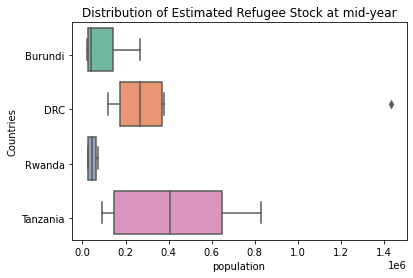

In [27]:
DFa = ReshapedData_by_Year.iloc[:, :4]

figa = sns.boxplot(data=DFa, orient="h", palette = "Set2")
plt.yticks([0.1, 1.1, 2.1, 3.1], ['Burundi', 'DRC', 'Rwanda', 'Tanzania'])
plt.title("Distribution of Estimated Refugee Stock at mid-year")
plt.xlabel('population')
plt.ylabel('Countries')



Text(0, 0.5, 'Countries')

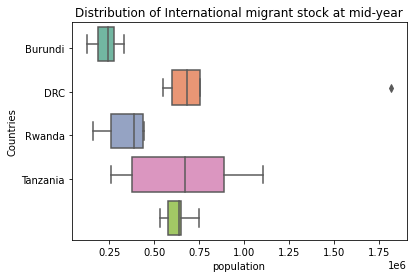

In [28]:


DFb = ReshapedData_by_Year.loc[:, 'International_migrant_stock_at_mid-year']

figb = sns.boxplot(data=DFb, orient="h", palette = "Set2")
plt.yticks([0.1, 1.1, 2.1, 3.1], ['Burundi', 'DRC', 'Rwanda', 'Tanzania'])
plt.title("Distribution of International migrant stock at mid-year")
plt.xlabel('population')
plt.ylabel('Countries')

Text(0, 0.5, 'Countries')

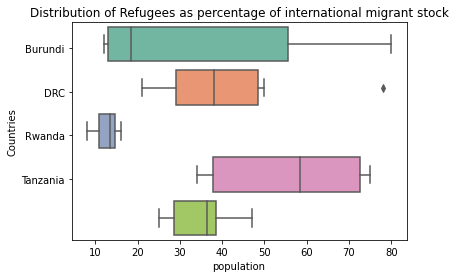

In [29]:
DFc = ReshapedData_by_Year.loc[:, 'Refugees_as_percentage_international_migrant_stock']

figc = sns.boxplot(data=DFc, orient="h", palette = "Set2")
plt.yticks([0.1, 1.1, 2.1, 3.1], ['Burundi', 'DRC', 'Rwanda', 'Tanzania'])
plt.title("Distribution of Refugees as percentage of international migrant stock")
plt.xlabel('population')
plt.ylabel('Countries')

In [30]:
ReshapedData_by_Year_2

Annual_rate_of_change_of_migrant_stock                              \
Country                                  Burundi  DRC Rwanda Tanzania Uganda   
Year                                                                           
1990-1995                                    -56  179     75      132     26   
1995-2000                                   -145 -175     75      -31      0   
2000-2005                                     68  -36     41      -31      7   
2005-2010                                     66  -12      8     -181    -40   
2010-2015                                     36  -13      2      -33     66   

          Annual_rate_of_change_of_refugee_stock                              
Country                                  Burundi  DRC Rwanda Tanzania Uganda  
Year                                                                          
1990-1995                                    -39   95    -66       99     61  
1995-2000                                   -220 -118    -43       -5      2  
2000-2005                                   -112  -67     97        0     10  
2005-2010                                      5  -30     19     -137    -87  
2010-2015                                     58  -55     16       -1    125

Text(0, 0.5, 'Countries')

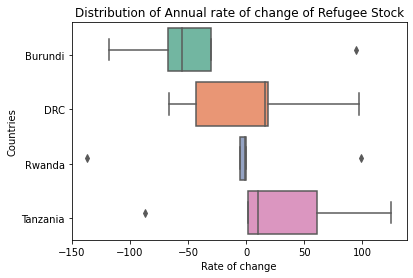

In [31]:
DF = ReshapedData_by_Year_2.iloc[:,6:]

fig = sns.boxplot(data=DF, orient="h", palette = "Set2")
plt.yticks([0.1, 1.1, 2.1, 3.1], ['Burundi', 'DRC', 'Rwanda', 'Tanzania'])
plt.title("Distribution of Annual rate of change of Refugee Stock")
plt.xlabel('Rate of change')
plt.ylabel('Countries')



Text(0, 0.5, 'Countries')

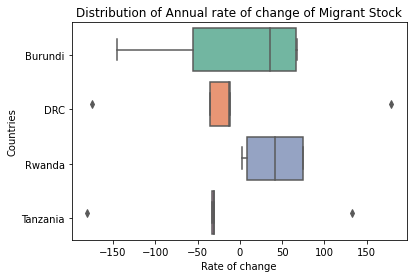

In [32]:
DF2 = ReshapedData_by_Year_2.iloc[:,:4]

fig2 = sns.boxplot(data=DF2, orient="h", palette = "Set2")
plt.yticks([0.1, 1.1, 2.1, 3.1], ['Burundi', 'DRC', 'Rwanda', 'Tanzania'])
plt.title("Distribution of Annual rate of change of Migrant Stock")
plt.xlabel('Rate of change')
plt.ylabel('Countries')


# Trends in Migrant Stock in Rwanda

Text(0.5, 1.0, 'Total Population of Rwanda by mid-year (1990 - 2015) ')

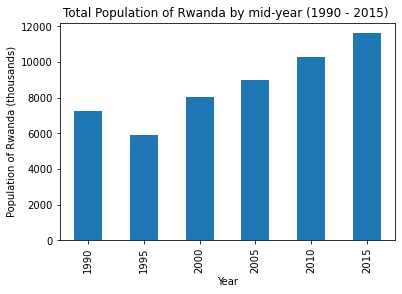

In [61]:
# Q1 - How does the migrant stock in Rwanda change between 1990 - 2015
# Visualizing change in Total population of Rwanda (1990 - 2015)

MigrantData_by_Country.loc['Rwanda', 'Total_population_at_mid-year'].plot(kind = 'bar')

plt.xlabel('Year')
plt.ylabel('Population of Rwanda (thousands)')
plt.title('Total Population of Rwanda by mid-year (1990 - 2015) ')

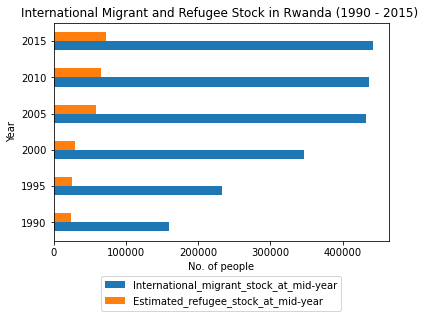

In [90]:
# Q1 - How does the migration trends in Rwanda change between 1990 - 2015
# Visualizing change in International Migrant stock and Refugee stock of Rwanda (1990 - 2015)

MigrantData_by_Country.loc['Rwanda',
                           ['International_migrant_stock_at_mid-year',
                            'Estimated_refugee_stock_at_mid-year']].plot(kind = 'barh')
plt.xlabel('No. of people')
plt.ylabel('Year')
plt.title('International Migrant and Refugee Stock in Rwanda (1990 - 2015) ')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.14))



Text(0.5, 1.0, 'Annual rate of change in migrant and refugee stock in Rwanda (1990 - 2015) ')

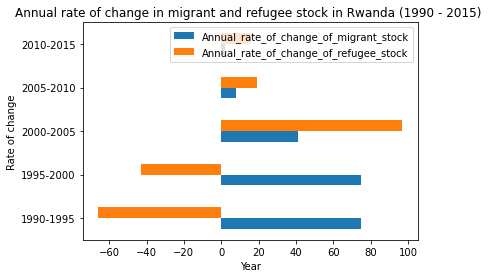

In [34]:
MigrantData_by_Country_2.loc['Rwanda', 
                             ['Annual_rate_of_change_of_migrant_stock',
                             'Annual_rate_of_change_of_refugee_stock']].plot(kind = 'barh')

plt.xlabel('Rate of change')
plt.ylabel('Year')
plt.title('Annual rate of change in migrant and refugee stock in Rwanda (1990 - 2015) ')

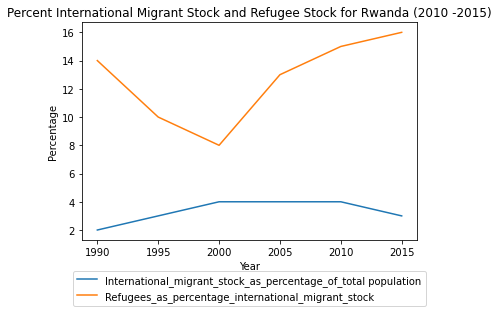

In [92]:
# Q1 - How does the migration trends in Rwanda change between 1990 - 2015
# Visualizing change in Percent International Migrant stock of total population and Percent Refugee stock of total Migrant population  in Rwanda (1990 - 2015)

MigrantData_by_Country.loc['Rwanda', ['International_migrant_stock_as_percentage_of_total population',
                          'Refugees_as_percentage_international_migrant_stock']].plot()



plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percent International Migrant Stock and Refugee Stock for Rwanda (2010 -2015)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12))



In [36]:
MigrantData_by_Country_2.loc['Rwanda', 
                             ['Annual_rate_of_change_of_migrant_stock',
                             'Annual_rate_of_change_of_refugee_stock']].plot()

plt.xlabel('Year')
plt.ylabel('Rate of change')
plt.title('Annual rate of change in migrant and refugee stock in Rwanda (1990 - 2015)')

Text(0.5, 1.0, 'Annual rate of change in migrant and refugee stock in Rwanda (1990 - 2015)')

# Trends in Migrant Stock across GreatLakes Crises Countries

Text(0.5, 1.0, 'Great Lakes Crises Countries: International Migrant Stock as percentage of Total Population (1990 - 2015)')

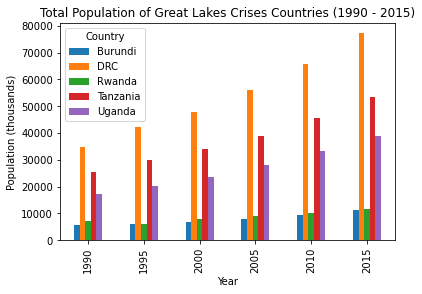

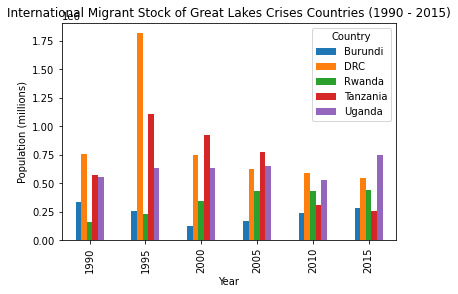

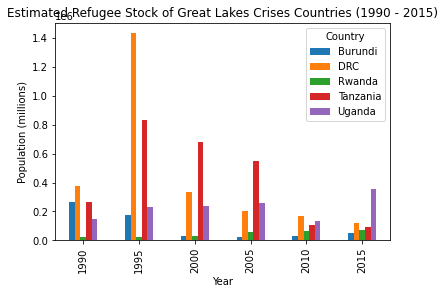

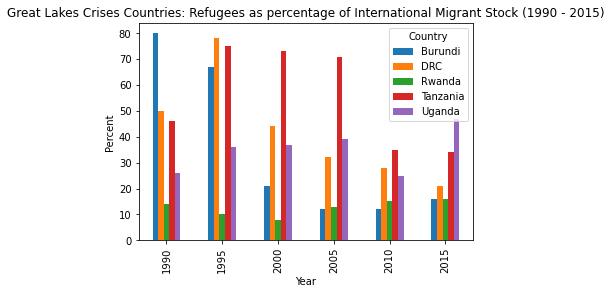

In [157]:
# Q2 - How does Rwanda's migration compare to the neighboring countries in the great lakes region for the same time period
#
# Trends in Migrant stock in comparison to Rwanda

ReshapedData_by_Year['Total_population_at_mid-year'].plot( kind = 'bar')

plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.title('Total Population of Great Lakes Crises Countries (1990 - 2015)')


ReshapedData_by_Year['International_migrant_stock_at_mid-year'].plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.title('International Migrant Stock of Great Lakes Crises Countries (1990 - 2015)')

ReshapedData_by_Year['Estimated_refugee_stock_at_mid-year'].plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.title('Estimated Refugee Stock of Great Lakes Crises Countries (1990 - 2015)')

ReshapedData_by_Year['Refugees_as_percentage_international_migrant_stock'].plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Great Lakes Crises Countries: Refugees as percentage of International Migrant Stock (1990 - 2015)')

ReshapedData_by_Year['International_migrant_stock_as_percentage_of_total population'].plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Great Lakes Crises Countries: International Migrant Stock as percentage of Total Population (1990 - 2015)')




Text(0.5, 1.0, 'Great Lake Countries: International Migrant Stock as percentation of Total Population (1990 - 2015)')

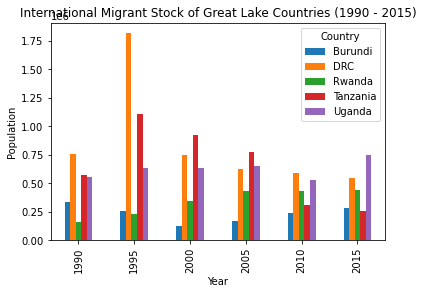

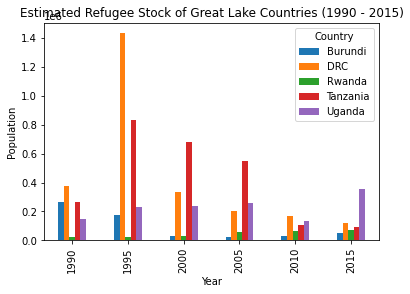

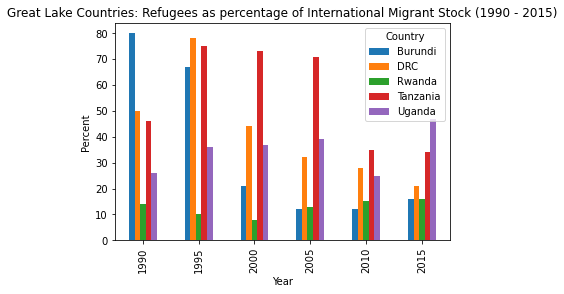

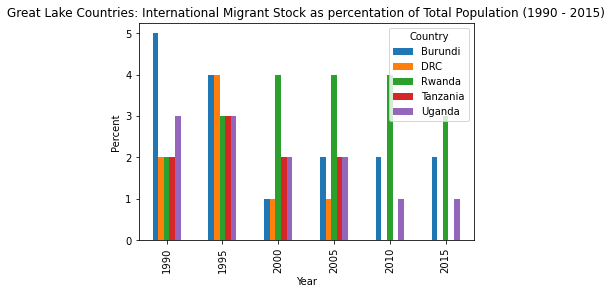

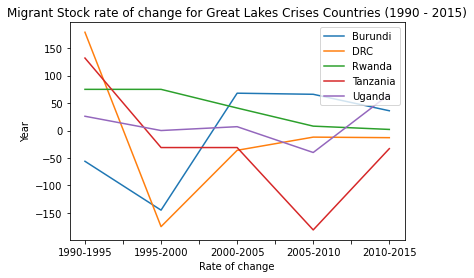

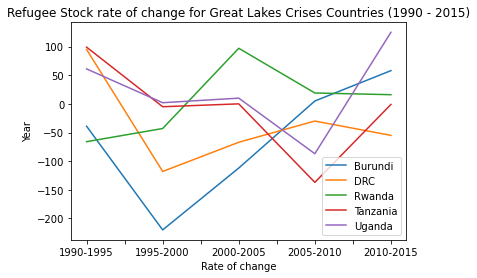

In [191]:
# Q3 - Which neighboring country saw the most increase in refugees – relative to international migrant stock for the same time period 

# 4 - Did the countries see decline in refugee acceptance overtime? 

ReshapedData_by_Year_2['Annual_rate_of_change_of_migrant_stock'].plot()

plt.xlabel('Rate of change')
plt.ylabel('Year')
plt.title('Migrant Stock rate of change for Great Lakes Crises Countries (1990 - 2015)')
plt.legend( loc='upper right')


ReshapedData_by_Year_2['Annual_rate_of_change_of_refugee_stock'].plot()

plt.xlabel('Rate of change')
plt.ylabel('Year')

plt.title('Refugee Stock rate of change for Great Lakes Crises Countries (1990 - 2015)')
plt.legend( loc='lower right')

# Calculating Mean & Sum

In [39]:
# Total International_migrant_stock_at_mid-year', 'Total_population_at_mid-year','Estimated_refugee_stock_at_mid-year for Great Lakes Crises countries by Year


Mean_MigrantData_by_Year = Great_Lakes_Countries.groupby(['Year'])[['International_migrant_stock_at_mid-year',
                                                'Total_population_at_mid-year',
                                                'Estimated_refugee_stock_at_mid-year',
                                                'International_migrant_stock_as_percentage_of_total population',
                                               'Refugees_as_percentage_international_migrant_stock']].mean()


Mean_MigrantData_by_Year_2 = Great_Lakes_Countries_2.groupby(['Year'])[['Annual_rate_of_change_of_migrant_stock',
                                                'Annual_rate_of_change_of_refugee_stock']].mean()


Mean_MigrantData_by_Year

International_migrant_stock_at_mid-year  Total_population_at_mid-year  \
Year                                                                          
1990                                 475901.0                       18135.6   
1995                                 809135.8                       20930.4   
2000                                 555994.8                       24117.6   
2005                                 530470.8                       28028.0   
2010                                 419751.2                       32898.4   
2015                                 456944.4                       38511.6   

      Estimated_refugee_stock_at_mid-year  \
Year                                        
1990                             216167.8   
1995                             538211.0   
2000                             261449.4   
2005                             218043.8   
2010                             101272.4   
2015                             137885.0   

      International_migrant_stock_as_percentage_of_total population  \
Year                                                                  
1990                                                2.8               
1995                                                3.4               
2000                                                2.0               
2005                                                2.2               
2010                                                1.4               
2015                                                1.2               

      Refugees_as_percentage_international_migrant_stock  
Year                                                      
1990                                               43.2   
1995                                               53.2   
2000                                               36.6   
2005                                               33.4   
2010                                               23.0   
2015                                               26.8

In [38]:

Mean_MigrantData_by_Year_2

Annual_rate_of_change_of_migrant_stock  \
Year                                                
1990-1995                                    71.2   
1995-2000                                   -55.2   
2000-2005                                     9.8   
2005-2010                                   -31.8   
2010-2015                                    11.6   

           Annual_rate_of_change_of_refugee_stock  
Year                                               
1990-1995                                    30.0  
1995-2000                                   -76.8  
2000-2005                                   -14.4  
2005-2010                                   -46.0  
2010-2015                                    28.6

In [185]:

Sum_MigrantData_by_Year_1a = Great_Lakes_Countries.groupby(['Year'])[['International_migrant_stock_at_mid-year',
                                                'Total_population_at_mid-year',
                                                'Estimated_refugee_stock_at_mid-year']].sum()


Sum_MigrantData_by_Year_1a

International_migrant_stock_at_mid-year  Total_population_at_mid-year  \
Year                                                                          
1990                                  2379505                         90678   
1995                                  4045679                        104652   
2000                                  2779974                        120588   
2005                                  2652354                        140140   
2010                                  2098756                        164492   
2015                                  2284722                        192558   

      Estimated_refugee_stock_at_mid-year  
Year                                       
1990                              1080839  
1995                              2691055  
2000                              1307247  
2005                              1090219  
2010                               506362  
2015                               689425

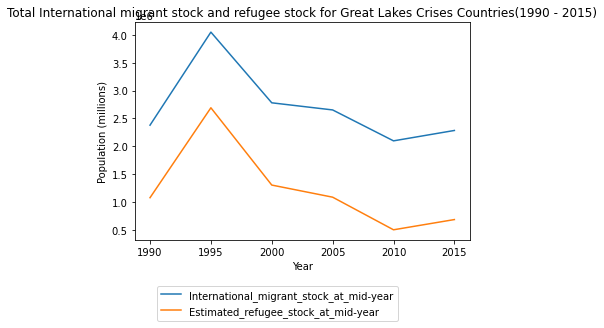

In [199]:
Sum_MigrantData_by_Year_1a.loc[:, ['International_migrant_stock_at_mid-year',
                                       'Estimated_refugee_stock_at_mid-year']].plot()
plt.legend( loc='upper right')
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.title('Total International migrant stock and refugee stock for Great Lakes Crises Countries(1990 - 2015)')
plt.legend(loc='upper right', bbox_to_anchor=(0.8, -0.19
                                             ))
                                            



In [134]:
Sum_MigrantData_by_Year_1a.loc[:, 'Total_population_at_mid-year'].plot(kind = 'barh')
plt.legend( loc='upper right')
plt.xlabel('Population(thousands)')
plt.ylabel('Year')
plt.title('Total Population of Great Lakes Crises Countries by mid-year (1990 - 2015')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.14))

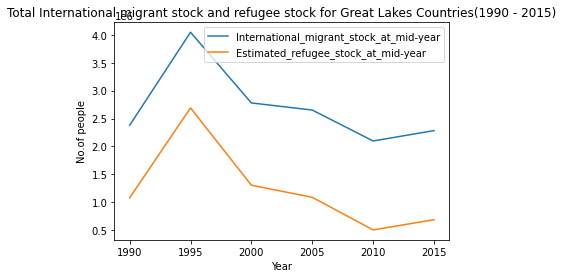

In [108]:
Mean_MigrantData_by_Year_1a.loc[:, ['International_migrant_stock_at_mid-year',
                                       'Estimated_refugee_stock_at_mid-year']].plot()


plt.xlabel('Year')
plt.ylabel('No.of people')
plt.title('Total International migrant stock and refugee stock for Great Lakes Countries(1990 - 2015)')
plt.legend( loc='upper right')


Mean_MigrantData_by_Year_2.loc[:, ['Annual_rate_of_change_of_migrant_stock',
                                       'Annual_rate_of_change_of_refugee_stock']].plot()

plt.legend( loc='upper right')
plt.xlabel('Year')
plt.ylabel('Rate of change')
plt.title('Mean Annual rate of change of Migrant Stock and Refugee stock(1990 - 2015)')
plt.legend( loc='upper right')


In [40]:
# Total International_migrant_stock_at_mid-year', 'Total_population_at_mid-year','Estimated_refugee_stock_at_mid-year for Great Lakes Crises countries by Year

Mean_MigrantData_by_Country= Great_Lakes_Countries.groupby(['Country'])[['International_migrant_stock_at_mid-year',
                                                   'Total_population_at_mid-year',
                                                   'Estimated_refugee_stock_at_mid-year',
                                                   'International_migrant_stock_as_percentage_of_total population',
                                                   'Refugees_as_percentage_international_migrant_stock']].mean()

Mean_MigrantData_by_Country_2 = Great_Lakes_Countries_2.groupby(['Country'])[['Annual_rate_of_change_of_migrant_stock',
                                                'Annual_rate_of_change_of_refugee_stock']].mean()


Mean_MigrantData_by_Country

International_migrant_stock_at_mid-year  \
Country                                             
Burundi                             234755.666667   
DRC                                 845509.500000   
Rwanda                              341875.666667   
Tanzania                            658152.666667   
Uganda                              626538.166667   

          Total_population_at_mid-year  Estimated_refugee_stock_at_mid-year  \
Country                                                                       
Burundi                         7865.5                         94322.166667   
DRC                            54082.0                        439210.333333   
Rwanda                          8684.5                         46045.833333   
Tanzania                       37923.0                        420746.166667   
Uganda                         26963.0                        227200.000000   

          International_migrant_stock_as_percentage_of_total population  \
Country                                                                   
Burundi                                            2.666667               
DRC                                                1.333333               
Rwanda                                             3.333333               
Tanzania                                           1.500000               
Uganda                                             2.000000               

          Refugees_as_percentage_international_migrant_stock  
Country                                                       
Burundi                                           34.666667   
DRC                                               42.166667   
Rwanda                                            12.666667   
Tanzania                                          55.666667   
Uganda                                            35.000000

In [41]:
Mean_MigrantData_by_Country_2.sort_values(by = 'Annual_rate_of_change_of_migrant_stock')

Annual_rate_of_change_of_migrant_stock  \
Country                                            
Tanzania                                   -28.8   
DRC                                        -11.4   
Burundi                                     -6.2   
Uganda                                      11.8   
Rwanda                                      40.2   

          Annual_rate_of_change_of_refugee_stock  
Country                                           
Tanzania                                    -8.8  
DRC                                        -35.0  
Burundi                                    -61.6  
Uganda                                      22.2  
Rwanda                                       4.6

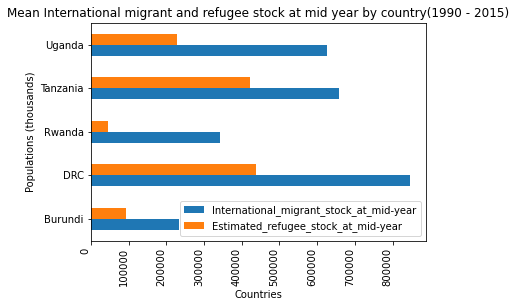

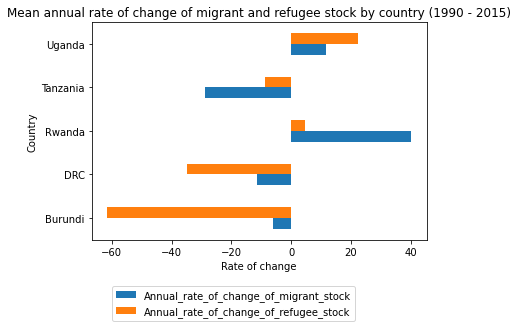

In [189]:

Mean_MigrantData_by_Country.loc[:, ['International_migrant_stock_at_mid-year',
                                       'Estimated_refugee_stock_at_mid-year']].plot(kind = 'barh')
plt.xticks(rotation=90, ha='right')

plt.xlabel('Countries')
plt.ylabel('Populations (thousands)')
plt.title('Mean International migrant and refugee stock at mid year by country(1990 - 2015)')
plt.legend( loc='lower right')

Mean_MigrantData_by_Country_2.loc[:, ['Annual_rate_of_change_of_migrant_stock',
                                       'Annual_rate_of_change_of_refugee_stock']].plot(kind= 'barh')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12))

plt.xlabel('Rate of change')
plt.ylabel('Country')
plt.title('Mean annual rate of change of migrant and refugee stock by country (1990 - 2015)')
plt.legend(loc='upper right', bbox_to_anchor=(0.8, -0.19
                                             ))


# Central Tendency and Distribution

In [43]:
# Central Distribution for International_migrant_stock_at_mid-year by countries from 1990 - 2015

MigrantStock_by_Country = Great_Lakes_Countries.groupby(['Country'])['International_migrant_stock_at_mid-year'].describe()

MigrantStock_by_Country


count           mean            std       min        25%       50%  \
Country                                                                        
Burundi     6.0  234755.666667   75532.208967  125628.0  188470.25  245056.0   
DRC         6.0  845509.500000  483232.260208  545694.0  597429.75  683628.0   
Rwanda      6.0  341875.666667  120140.509727  159869.0  261669.00  389936.5   
Tanzania    6.0  658152.666667  338537.674131  261222.0  374956.25  672435.5   
Uganda      6.0  626538.166667   77564.163868  529160.0  577385.25  634661.5   

                75%        max  
Country                         
Burundi   278820.75   333110.0  
DRC       751742.25  1816963.0  
Rwanda    435789.50   441525.0  
Tanzania  888846.50  1106043.0  
Uganda    648401.75   749471.0

In [44]:
# Central Distribution for International_migrant_stock_at_mid-year by countries from 1990 - 2015

MigrantStock_by_Year = Great_Lakes_Countries.groupby(['Year'])['International_migrant_stock_at_mid-year'].describe()

MigrantStock_by_Year

count      mean            std       min       25%       50%        75%  \
Year                                                                            
1990    5.0  475901.0  231371.755388  159869.0  333110.0  558307.0   574025.0   
1995    5.0  809135.8  665818.440534  233200.0  254853.0  634620.0  1106043.0   
2000    5.0  555994.8  319793.320913  125628.0  347076.0  634703.0   744387.0   
2005    5.0  530470.8  233847.637749  172874.0  432797.0  622869.0   652968.0   
2010    5.0  419751.2  147716.535163  235259.0  308600.0  436787.0   529160.0   
2015    5.0  456944.4  200586.037045  261222.0  286810.0  441525.0   545694.0   

            max  
Year             
1990   754194.0  
1995  1816963.0  
2000   928180.0  
2005   770846.0  
2010   588950.0  
2015   749471.0

In [45]:
# Central Distribution for Estimated_refugee_stock_at_mid-year by countries from 1990 - 2015

RefugeeStock_by_Country = Great_Lakes_Countries.groupby(['Country'])['Estimated_refugee_stock_at_mid-year'].describe()

RefugeeStock_by_Country

count           mean            std       min        25%       50%  \
Country                                                                        
Burundi     6.0   94322.166667  102618.216793   20681.0   27693.25   38585.0   
DRC         6.0  439210.333333  497165.724639  119754.0  175837.25  268425.0   
Rwanda      6.0   46045.833333   22192.952119   23446.0   26472.25   44617.5   
Tanzania    6.0  420746.166667  310307.653732   90650.0  148260.50  407004.0   
Uganda      6.0  227200.000000   81507.304279  135801.0  166626.00  232986.0   

                75%        max  
Country                         
Burundi   141714.00   267929.0  
DRC       367048.75  1433760.0  
Rwanda     63959.75    72763.0  
Tanzania  647852.50   829671.0  
Uganda    252097.50   358453.0

In [46]:
# Central Distribution for Estimated_refugee_stock_at_mid-year from 1990 - 2015 for countries in the Great Lakes Crises


RefugeeStock_by_Year = Great_Lakes_Crises_Countries.groupby(['Year'])['Estimated_refugee_stock_at_mid-year'].describe()

RefugeeStock_by_Year

count      mean            std      min       25%       50%       75%  \
Year                                                                          
1990    5.0  216167.8  135608.399811  23446.0  145718.0  265184.0  267929.0   
1995    5.0  538211.0  587120.201508  25257.0  173017.0  229350.0  829671.0   
2000    5.0  261449.4  269253.496554  27136.0   30118.0  236622.0  332509.0   
2005    5.0  218043.8  209374.489045  20681.0   59117.0  204341.0  257256.0   
2010    5.0  101272.4   54623.172704  29365.0   65574.0  109286.0  135801.0   
2015    5.0  137885.0  126060.900257  47805.0   72763.0   90650.0  119754.0   

            max  
Year             
1990   378562.0  
1995  1433760.0  
2000   680862.0  
2005   548824.0  
2010   166336.0  
2015   358453.0

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mean Refugee Stock of Great Lakes Crises Countries vs. Time (years)')

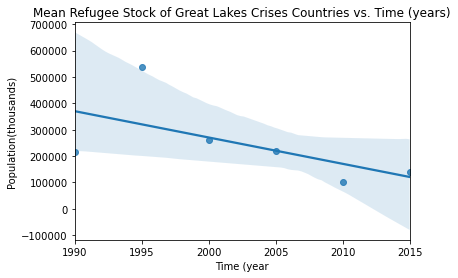

In [193]:
#linear regression of RefugeeStock_by_Year
x = np.array([1990, 1995, 2000, 2005, 2010, 2015])
y = np.array([216167.8, 538211.0, 261449.4, 218043.8, 101272.4, 137885.0])
#y = RefugeeStock_by_Year.iloc[:, 1].values

sns.regplot(x, y)

plt.xlabel('Time (year')
plt.ylabel('Population(thousands)')

plt.title('Mean Refugee Stock of Great Lakes Crises Countries vs. Time (years)')


In [48]:
# Central Distribution for Refugees_as_percentage_international_migrant_stock from 1990 - 2015 for countries in the Great Lakes Crises

PercentRefugees_of_MigrantStock_by_Country = Great_Lakes_Countries.groupby(['Country'])['Refugees_as_percentage_international_migrant_stock'].describe()

PercentRefugees_of_MigrantStock_by_Country

count       mean        std   min    25%   50%    75%   max
Country                                                              
Burundi     6.0  34.666667  30.539592  12.0  13.00  18.5  55.50  80.0
DRC         6.0  42.166667  20.497967  21.0  29.00  38.0  48.50  78.0
Rwanda      6.0  12.666667   3.076795   8.0  10.75  13.5  14.75  16.0
Tanzania    6.0  55.666667  19.490168  34.0  37.75  58.5  72.50  75.0
Uganda      6.0  35.000000   8.318654  25.0  28.50  36.5  38.50  47.0

In [49]:
# Central Distribution for Refugees_as_percentage_international_migrant_stock from 1990 - 2015 for countries in the Great Lakes Crises


PercentRefugees_of_MigrantStock_by_Year = Great_Lakes_Countries.groupby(['Year'])['Refugees_as_percentage_international_migrant_stock'].describe()

PercentRefugees_of_MigrantStock_by_Year

count  mean        std   min   25%   50%   75%   max
Year                                                      
1990    5.0  43.2  25.282405  14.0  26.0  46.0  50.0  80.0
1995    5.0  53.2  29.337689  10.0  36.0  67.0  75.0  78.0
2000    5.0  36.6  24.704251   8.0  21.0  37.0  44.0  73.0
2005    5.0  33.4  24.089417  12.0  13.0  32.0  39.0  71.0
2010    5.0  23.0   9.460444  12.0  15.0  25.0  28.0  35.0
2015    5.0  26.8  13.479614  16.0  16.0  21.0  34.0  47.0

In [51]:
# Central Distribution for rate of change in migrant stock from 1990 - 2015 for countries in the Great Lakes Crises

RateChange_MigrantStock_by_Year = Great_Lakes_Countries_2.groupby(['Year'])['Annual_rate_of_change_of_migrant_stock'].describe()

RateChange_MigrantStock_by_Year

count  mean         std    min    25%   50%    75%    max
Year                                                                
1990-1995    5.0  71.2   91.589847  -56.0   26.0  75.0  132.0  179.0
1995-2000    5.0 -55.2  103.683171 -175.0 -145.0 -31.0    0.0   75.0
2000-2005    5.0   9.8   45.085474  -36.0  -31.0   7.0   41.0   68.0
2005-2010    5.0 -31.8   92.017390 -181.0  -40.0 -12.0    8.0   66.0
2010-2015    5.0  11.6   39.500633  -33.0  -13.0   2.0   36.0   66.0

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-52-9cdaacdf7aab>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015'])


[Text(5.0, 0, '1990-1995'),
 Text(7.5, 0, '1995-2000'),
 Text(10.0, 0, '2000-2005'),
 Text(12.5, 0, '2005-2010'),
 Text(15.0, 0, '2010-2015'),
 Text(17.5, 0, ''),
 Text(20.0, 0, ''),
 Text(22.5, 0, ''),
 Text(25.0, 0, '')]

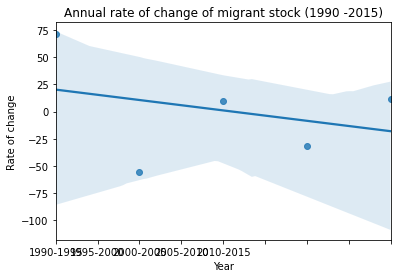

In [52]:
#Regression Line of Annual_rate_of_change_of_migrant_stoc
x = np.array([5, 10, 15, 20, 25])
y = np.array([71.2, -55.2,   9.8, -31.8,  11.6])
ax = sns.regplot(x, y)

ax.set(xlabel = 'Year',
       ylabel = 'Rate of change',
       title = 'Annual rate of change of migrant stock (1990 -2015)')

ax.set_xticklabels(['1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015'])

